

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [9]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = twoDaysAgo
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-19'] ['2016-12-18'] ['2016-12-13']
['2016-12-18']
'2016-12-18'


### get url

In [10]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-18'


In [11]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [12]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [14]:
df = pd.read_csv(url)

In [15]:
df.shape

(109, 16)

#### wow, 5 days > 1000 reports

In [16]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6640301,12/18/2016 07:18:07 PM,NaN,12/18/2016 07:18:07 PM,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Transit_Shelter_Platform - Not_Offensive,Intersection of 22ND ST and MISSION ST,9,Mission,"(37.7554369160237, -122.418747688955)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg
1,6640257,12/18/2016 06:51:16 PM,NaN,12/18/2016 06:51:16 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 18TH ST and MISSION ST,9,Mission,"(37.7618358043403, -122.419359315196)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b1a3da153f1b6e8094b/photo_20161218_184937.jpg
2,6640242,12/18/2016 06:44:14 PM,NaN,12/18/2016 08:52:25 PM,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 18TH ST and LAPIDGE ST,8,Mission Dolores,"(37.7616500893134, -122.422411478329)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585749773da153f1b6e80936/photo_20161218_184319.jpg


In [17]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [18]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6640301,2016-12-18 19:18:07,NaT,2016-12-18 19:18:07,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Transit_Shelter_Platform - Not_Offensive,Intersection of 22ND ST and MISSION ST,9,Mission,"(37.7554369160237, -122.418747688955)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg
1,6640257,2016-12-18 18:51:16,NaT,2016-12-18 18:51:16,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 18TH ST and MISSION ST,9,Mission,"(37.7618358043403, -122.419359315196)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b1a3da153f1b6e8094b/photo_20161218_184937.jpg
2,6640242,2016-12-18 18:44:14,NaT,2016-12-18 20:52:25,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 18TH ST and LAPIDGE ST,8,Mission Dolores,"(37.7616500893134, -122.422411478329)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585749773da153f1b6e80936/photo_20161218_184319.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=18.0, right=18.0
  'left=%s, right=%s') % (left, right))


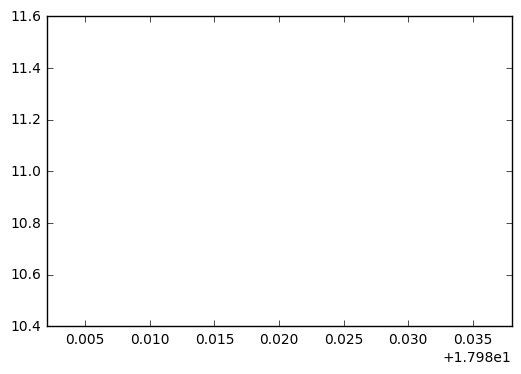

In [19]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=18.0, right=18.0
  'left=%s, right=%s') % (left, right))


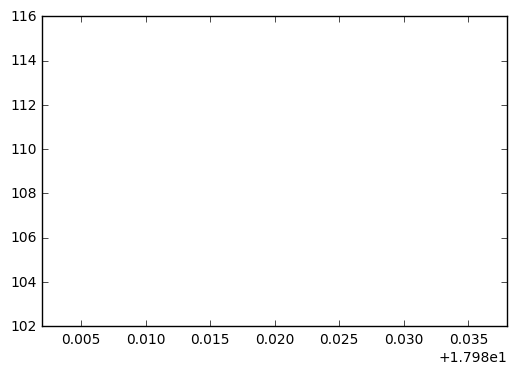

In [20]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=6.0, right=6.0
  'left=%s, right=%s') % (left, right))


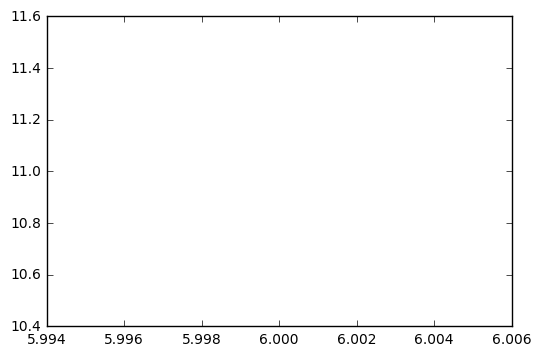

In [21]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [22]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [23]:

df['Request Details'].value_counts()


Other_enter_additional_details_below - Offensive    18
Building_commercial - Not_Offensive                 14
Building_other - Not_Offensive                      12
Sidewalk_in_front_of_property - Not_Offensive       12
Transit_Shelter_Platform - Not_Offensive             9
Signal_box - Not_Offensive                           8
Building_residential - Not_Offensive                 7
Sidewalk_structure - Not_Offensive                   4
Parking_meter - Not_Offensive                        4
Pole - Offensive                                     4
Mail_box - Not_Offensive                             4
Pole - Not_Offensive                                 3
City_receptacle - Not_Offensive                      3
News_rack - Not_Offensive                            2
Building_commercial - Offensive                      1
Street - Not_Offensive                               1
Mail_box - Offensive                                 1
Transit_Shelter_Platform - Offensive                 1
Signal_box

In [24]:
df['Supervisor District'].value_counts().sort_index()



1      1
2      1
3     10
5     12
6      2
7      2
8     31
9     49
11     1
Name: Supervisor District, dtype: int64

In [25]:
df.Neighborhood.value_counts()

Mission                    50
Duboce Triangle            17
Lower Haight                8
Mint Hill                   6
Chinatown                   4
Haight Ashbury              3
South of Market             2
Mission Dolores             2
Inner Sunset                1
Lower Nob Hill              1
Russian Hill                1
Inner Richmond              1
Excelsior                   1
Castro                      1
Dolores Heights             1
Forest Hill                 1
Downtown / Union Square     1
Sunnyside                   1
Portola                     1
St. Mary's Park             1
Name: Neighborhood, dtype: int64

In [26]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6640301,2016-12-18 19:18:07,NaT,2016-12-18 19:18:07,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Transit_Shelter_Platform - Not_Offensive,Intersection of 22ND ST and MISSION ST,9,Mission,"(37.7554369160237, -122.418747688955)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg
1,6640257,2016-12-18 18:51:16,NaT,2016-12-18 18:51:16,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 18TH ST and MISSION ST,9,Mission,"(37.7618358043403, -122.419359315196)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b1a3da153f1b6e8094b/photo_20161218_184937.jpg
6,6640012,2016-12-18 16:18:57,NaT,2016-12-18 20:59:44,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"3352 23RD ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.753891255801, -122.419882153056)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585727643da153f1b6e806b0/report.jpg
7,6639837,2016-12-18 15:11:08,NaT,2016-12-18 15:26:39,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"2807 HARRISON ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752378055061, -122.411693999292)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585717813da153f1b6e80543/photo_20161218_150854.jpg
12,6639781,2016-12-18 14:49:12,2016-12-18 15:20:02,2016-12-18 15:20:02,Closed,Case Resolved - meter shop has closed this request,DPT Meter_Bike Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Parking_meter - Not_Offensive,"3243 21ST ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.756860965413, -122.419831516549)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585712603da153f1b6e8046b/report.jpg
13,6639779,2016-12-18 14:48:53,NaT,2016-12-18 15:40:11,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,"3243 21ST ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.756860965413, -122.419831516549)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5857124a3da153f1b6e8045f/report.jpg
14,6639771,2016-12-18 14:46:08,NaT,2016-12-18 15:09:40,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"1125 VALENCIA ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.754811330082, -122.4207374841)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585711a83da153f1b6e80452/report.jpg
15,6639770,2016-12-18 14:45:48,NaT,2016-12-18 15:10:03,Open,open,DPW BSM Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"1125 VALENCIA ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.754811330082, -122.4207374841)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585711933da153f1b6e80446/report.jpg
16,6639768,2016-12-18 14:45:18,NaT,2016-12-18 14:46:12,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"147 BARTLETT ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.754624003212, -122.419648316205)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585711743da153f1b6e8043a/report.jpg
17,6639764,2016-12-18 14:44:20,NaT,2016-12-18 14:48:23,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"170 


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [27]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [28]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714fd3da153f1b6e80501/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714d73da153f1b6e804f4/report.jpg
2                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714b93da153f1b6e804d3/report.jpg
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/58570a583da153f1b6e80350/photo_20161218_141441.jpg
4                                                                                                                NaN
5    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856e8f23da153f1b6e7ffdb/photo_20161218_115156.jpg
6    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856e06e3da153f1b6e7fe93/photo_20161218_111341.jpg
7    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856dfb33da153f1b6e7fe49/photo_20161218_111209.jpg
8    http://mobile311.sfgov.org/media/san_francisco/report/photo

In [29]:
print(peskin[:])

0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714fd3da153f1b6e80501/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714d73da153f1b6e804f4/report.jpg
2                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585714b93da153f1b6e804d3/report.jpg
3    http://mobile311.sfgov.org/media/san_francisco/report/photos/58570a583da153f1b6e80350/photo_20161218_141441.jpg
4                                                                                                                NaN
5    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856e8f23da153f1b6e7ffdb/photo_20161218_115156.jpg
6    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856e06e3da153f1b6e7fe93/photo_20161218_111341.jpg
7    http://mobile311.sfgov.org/media/san_francisco/report/photos/5856dfb33da153f1b6e7fe49/photo_20161218_111209.jpg
8    http://mobile311.sfgov.org/media/san_francisco/report/photo

# The whole City

In [30]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b1a3da153f1b6e8094b/photo_20161218_184937.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/585749773da153f1b6e80936/photo_20161218_184319.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5857395f3da153f1b6e80823/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585731833da153f1b6e8078a/report.jpg
5                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5857287c3da153f1b6e806d3/report.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585727643da153f1b6e806b0/report.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/585717813da153f1b6e80543/photo_20161218_150854.jpg
8                    http://mobile311.sfgov.org/media/sa

In [31]:
len(images)

91

In [32]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/585749773da153f1b6e80936/photo_20161218_184319.jpg


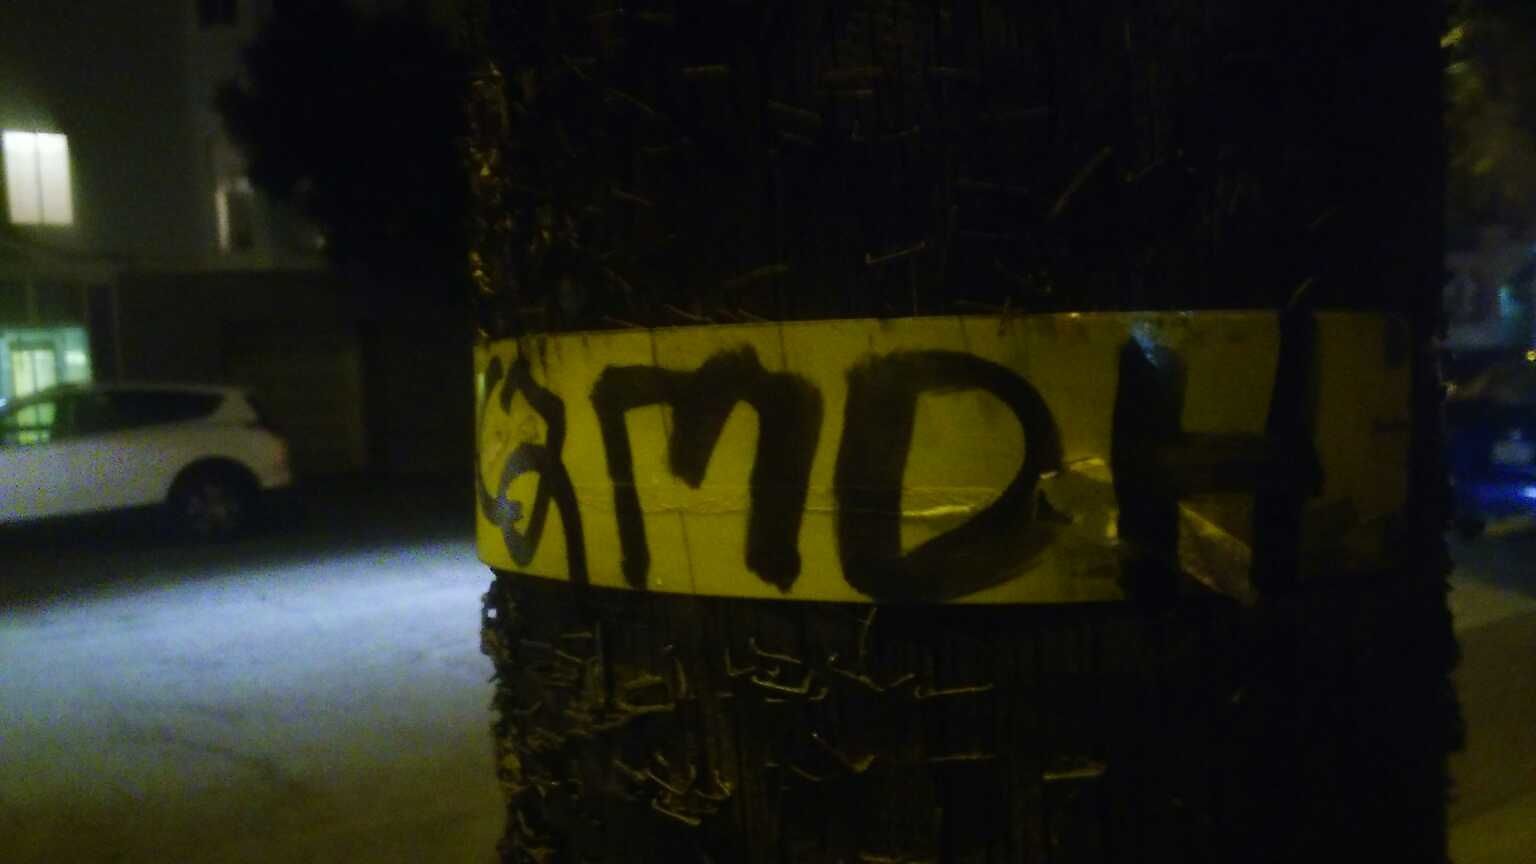

In [34]:
print(images[2])
Image(images[2])


In [35]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [36]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [37]:
!yes| bash vidCreate.sh 

--2016-12-20 11:48:49--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585751663da153f1b6e809d9/photo_20161218_191703.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138158 (135K) [image/jpeg]
Saving to: 'photo_20161218_191703.jpg'

photo_20161218_1917 100%[===================>] 134.92K   699KB/s    in 0.2s    

2016-12-20 11:48:49 (699 KB/s) - 'photo_20161218_191703.jpg' saved [138158/138158]

--2016-12-20 11:48:49--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58574b1a3da153f1b6e8094b/photo_20161218_184937.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 67153 (66K) [image/jpeg]
Saving to: 'photo_20161218_184937.jpg'

photo_20161218_1849 100%[===================>]  65.58K  --.-KB/s    in 0s      

2016-12-20 11:48:49 (414

In [ ]:
!ls -la
